# 군집분석

* 개체간 유사성에 따라 집단을 분류하고, 군집 내 유사성과 군집 간 상이성을 규명하는 다변량 분석 기법이다.

* 군집분석에서는 관측 데이터 간 유사성이나 근접성을 측정해 어느 군집으로 묶을 수 있는지 판단해야 한다.

## 거리측도

### 1. 연속형인 경우

* 유클리디안거리 (euclidean) : 가장 널리 사용되나 통계적 개념이 내포되어 있지 않아 변수들의 산포 정도가 전혀 감안되어 있지 않음.
* 표준화 거리(Standardized) : 해당변수의 표준편차로 척도 변환 후 유클리드안 거리를 계산하는 방법. 분산 차이로 인한 왜곡을 피할 수 있음.
* 마할라노비스 거리(Mahalanobis) : 통계적 개념이 포함된 거리로 두 벡터 사이의 거리를 표본공분산으로 나눠주어야 한다. 그룹에 대한 사전 지식 없이는 표본공분산 S를 계산할 수 없으므로 사용하기 곤란하다.
* 체비셰프 거리 (Chebyshev) : $d(x,y) = max_{i} |x_i-y_i|$
* 멘하탄 거리 (Manhattan) : 유클리디안과 비슷 -> $d(x,y) = \sum |x_i-y_i|$
* 캔버라 거리(Canberra), 민코우스키(Minkowski) 거리 등이 있음    

### 2. 범주형인 경우

* 자카드 거리

$$ 1-  J(A,B) = \frac {|A\cup B|- |A\cap B|}{|A\cup B|}$$

* 코사인 유사도 : 두 개체의 백터 내적의 코사인 값을 이용하여 측정된 벡터간의 유사한 정도

In [4]:
library(tidyverse)

# 1. 계층적 군집분석

* n개의 군집으로 시작해 점차 군집의 개수를 줄여 나가는 방법

## 1-1. 종류

* 최단연결법 (single linkage, nearest neighbor)
    * nxn 거리 행렬에서 가장 가까운 데이터를 묶어서 군집을 형성한다.

* 최장연결법 (complete linkage) : 데이터 간 거리를 계산할 때 최장거리를 거리로 계산하여 거리행렬을 수정하는 방법

* 평균연결법 (average linkage)

* 와드연결법(Ward linkage) : 군집 내 편차들의 제곱합을 고려한 방법, 군집간 정보의 손실을 최소화 하기 위해 군집화를 진행 $\to sse$를 고려한다고 생각

## 1-2. 절차

step 1. 거리행렬을 통해 가장 가까운 거리의 객체들 간의 관계를 규명하고 덴드로그램을 그린다.

step 2. 덴드로그램을 보고 군집의 개수를 변화해 가면서 적절한 군집 수를 선정한다.

step 3. 군집의 수는 분석 목적에 따라 선정할수 있지만 대부분 5개 이상의 군집은 잘 활용하지 않는다.

## 1-3. R 실습

* dist(data, method)
    * method : 거리측정방법, euclidean, maximum, manhattan, canberra, binary, minkowski가 있음

* hclust (data, method)
    * data : dist 함수로 거리가 측정된 데이터
    * method : 거리측정 밥법, single, complete, average, median, ward.D 가 있음 

In [14]:
US <- USArrests
head(US)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [18]:
US.dist <- dist(US, "euclidean")

* `dist^2`을 한 이유는 거리의 차이를 많이 두어 군집이 나뉘는 것을 쉽게 확인하기 위해서임.

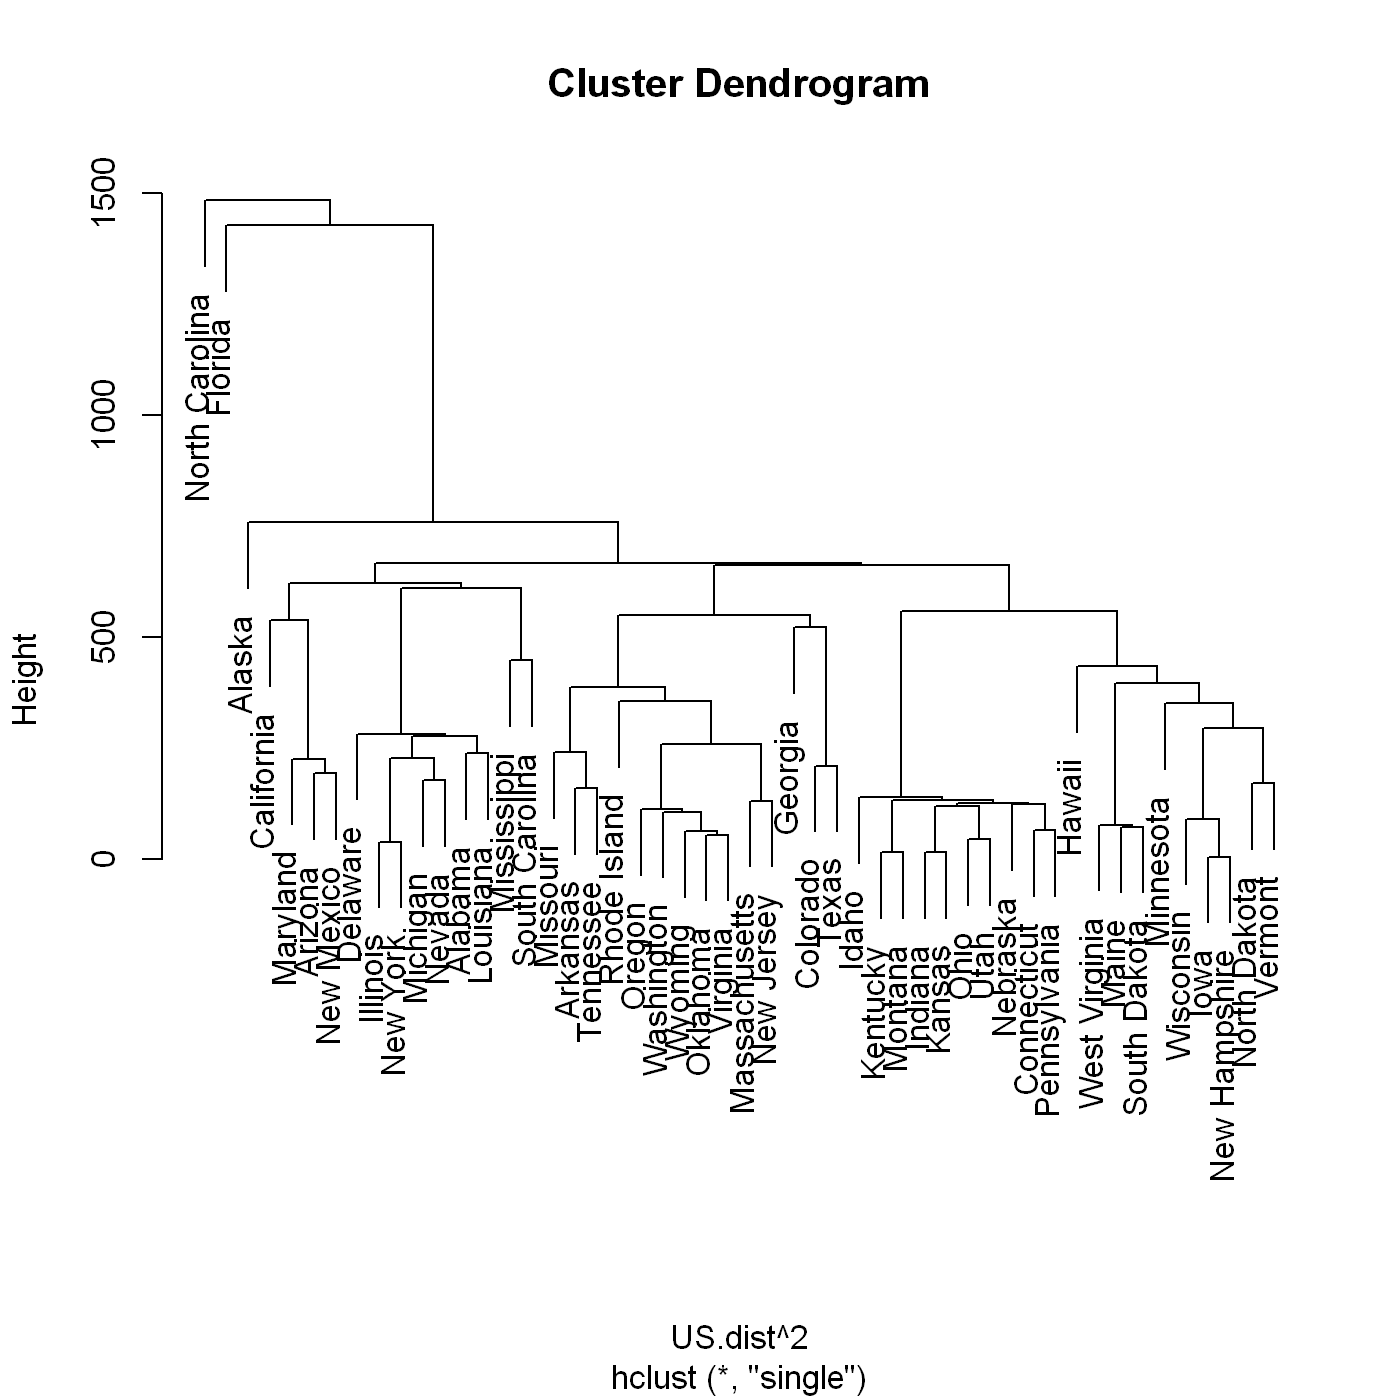

In [37]:
# hclust 함수를 이용하여 계층적 군집분석
options(repr.plot.res=200,repr.plot.hight=5,repr.plot.width=7)
US.single <- hclust(US.dist^2,method="single")
plot(US.single)

In [53]:
# cutree함수를 이용하여 계층적 군집결과를 그릅 나누기
group <- cutree(US.single,k=5) ## k는 군집의 수, h는 높이
group

Alabama         Alaska        Arizona       Arkansas     California 
             1              2              1              3              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              3              1              4              3 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              1              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              5              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              3              3              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

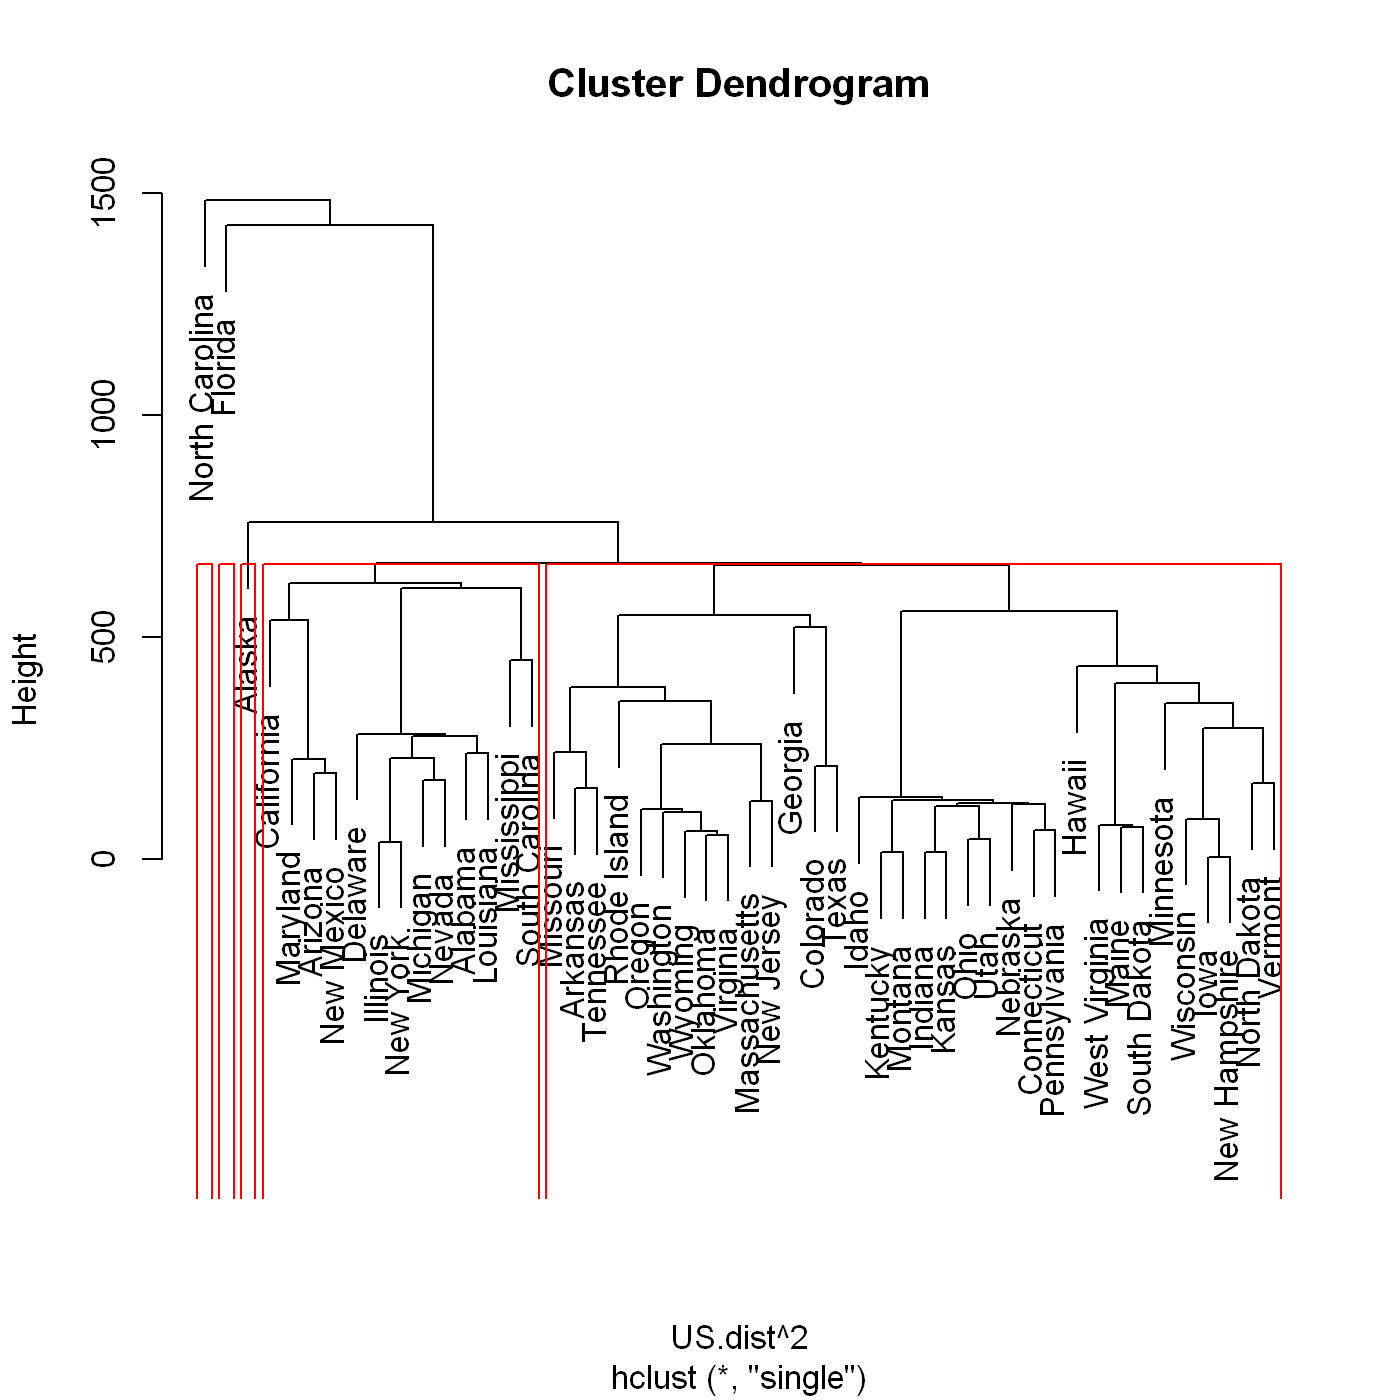

In [55]:
## 각각의 그룹을 사각형으로 그룹지어 나타나기
plot(US.single)
rect.hclust(US.single,k=5,border="red")

***

# 2. 비계층적 군집분석 (K-means clustering)

* 주어진 데이터를 k개의 클러스터로 묶는 알고리즘, 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 동작
* 알고리즘이 단순하며 계층적 군집분석에 비해 많은 양의 데이터를 다룰 수 있으며 사전 정보가 없을 경우 의미있는 자료 구조를 찾을 수 있음.
* 허나 군집의 수, 가중치와 거리 정의가 어려우며, 사전에 주어진 목적이 없으므로 결과 해석이 어려움.
* 또한 잡음이나 이상값의 영향을 받으며 초기 군집 수를 결정해야 한다는 단점이 있다.

In [66]:
setwd("C:\\Users\\lee\\Desktop\\PART 05 실습용 데이터")
credit_data <- read_csv("credit_final.csv")
#glimpse(credit_data) ## credit.rating의 경우 factor 변수이므로 변환
credit_data$credit.rating <- as_factor(credit_data$credit.rating)

Rows: 1000 Columns: 21

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (21): credit.rating, account.balance, credit.duration.months, previous.c...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [67]:
# summary(credit_data)
## 데이터 분할 각각의 데이터를 7:3으로 나눔
train <- credit_data %>% sample_frac(0.7)
test <- credit_data %>% setdiff(train)

In [68]:
train.data <- train %>% select(-1)
credit.kmeans <- kmeans(train.data,centers=2)
names(credit.kmeans)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [69]:
cluster <- as.factor(ifelse(credit.kmeans$cluster==1,0,1))
library(caret)
confusionMatrix(cluster,train$credit.rating,positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  48  75
         1 166 411
                                          
               Accuracy : 0.6557          
                 95% CI : (0.6192, 0.6909)
    No Information Rate : 0.6943          
    P-Value [Acc > NIR] : 0.9873          
                                          
                  Kappa : 0.0794          
                                          
 Mcnemar's Test P-Value : 6.735e-09       
                                          
            Sensitivity : 0.8457          
            Specificity : 0.2243          
         Pos Pred Value : 0.7123          
         Neg Pred Value : 0.3902          
             Prevalence : 0.6943          
         Detection Rate : 0.5871          
   Detection Prevalence : 0.8243          
      Balanced Accuracy : 0.5350          
                                          
       'Positive' Class : 1               
                              

* 실제 데이터와 군집분설결과의 confusion matrix 확인 -> 그닥 결과가 좋지는 않음

* 또한 전체변동에서 군집 간 변동이 차지하는 비율을 보았을 때 약 70%로 좋은 모델이라고 판단할 수 없다.

In [70]:
credit.kmeans$betweenss/credit.kmeans$totss

[1] 0.6900747

* NbClust함수를 이용하면 최적의 군집수를 찾을 수 있다.

In [74]:
library(NbClust)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


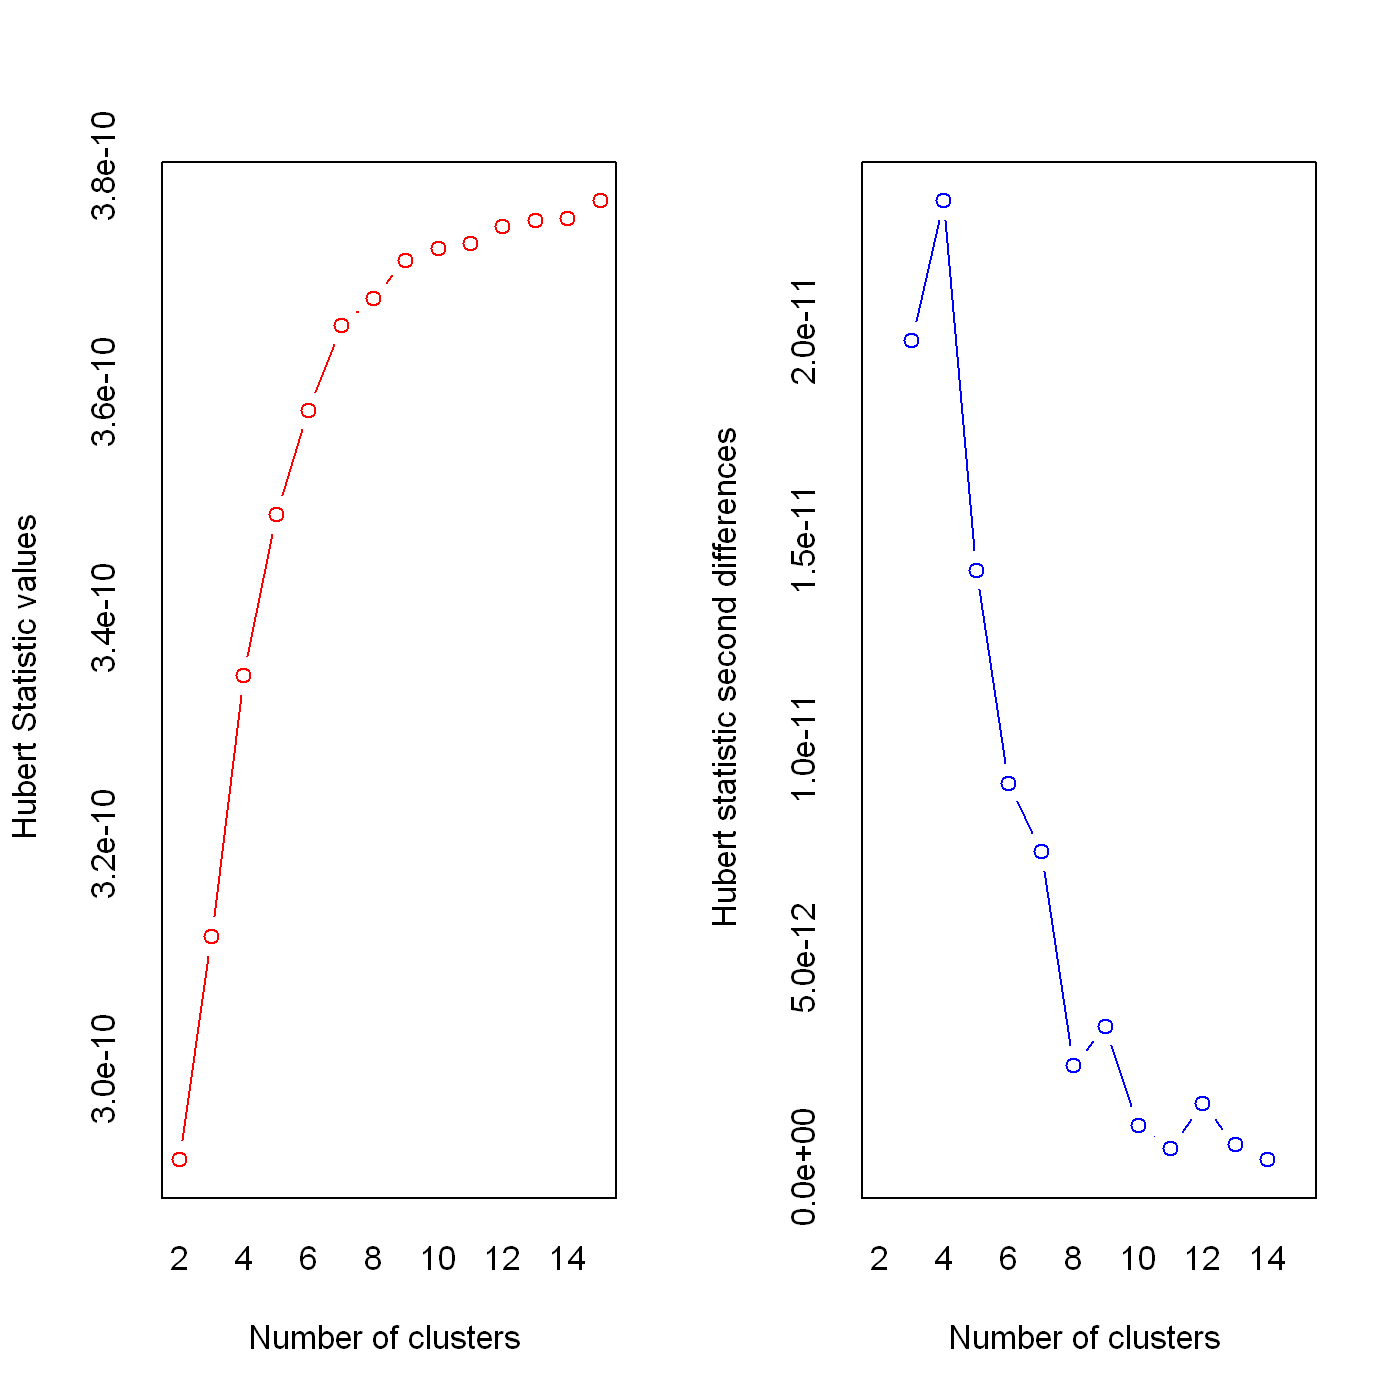

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 8 proposed 4 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 5 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


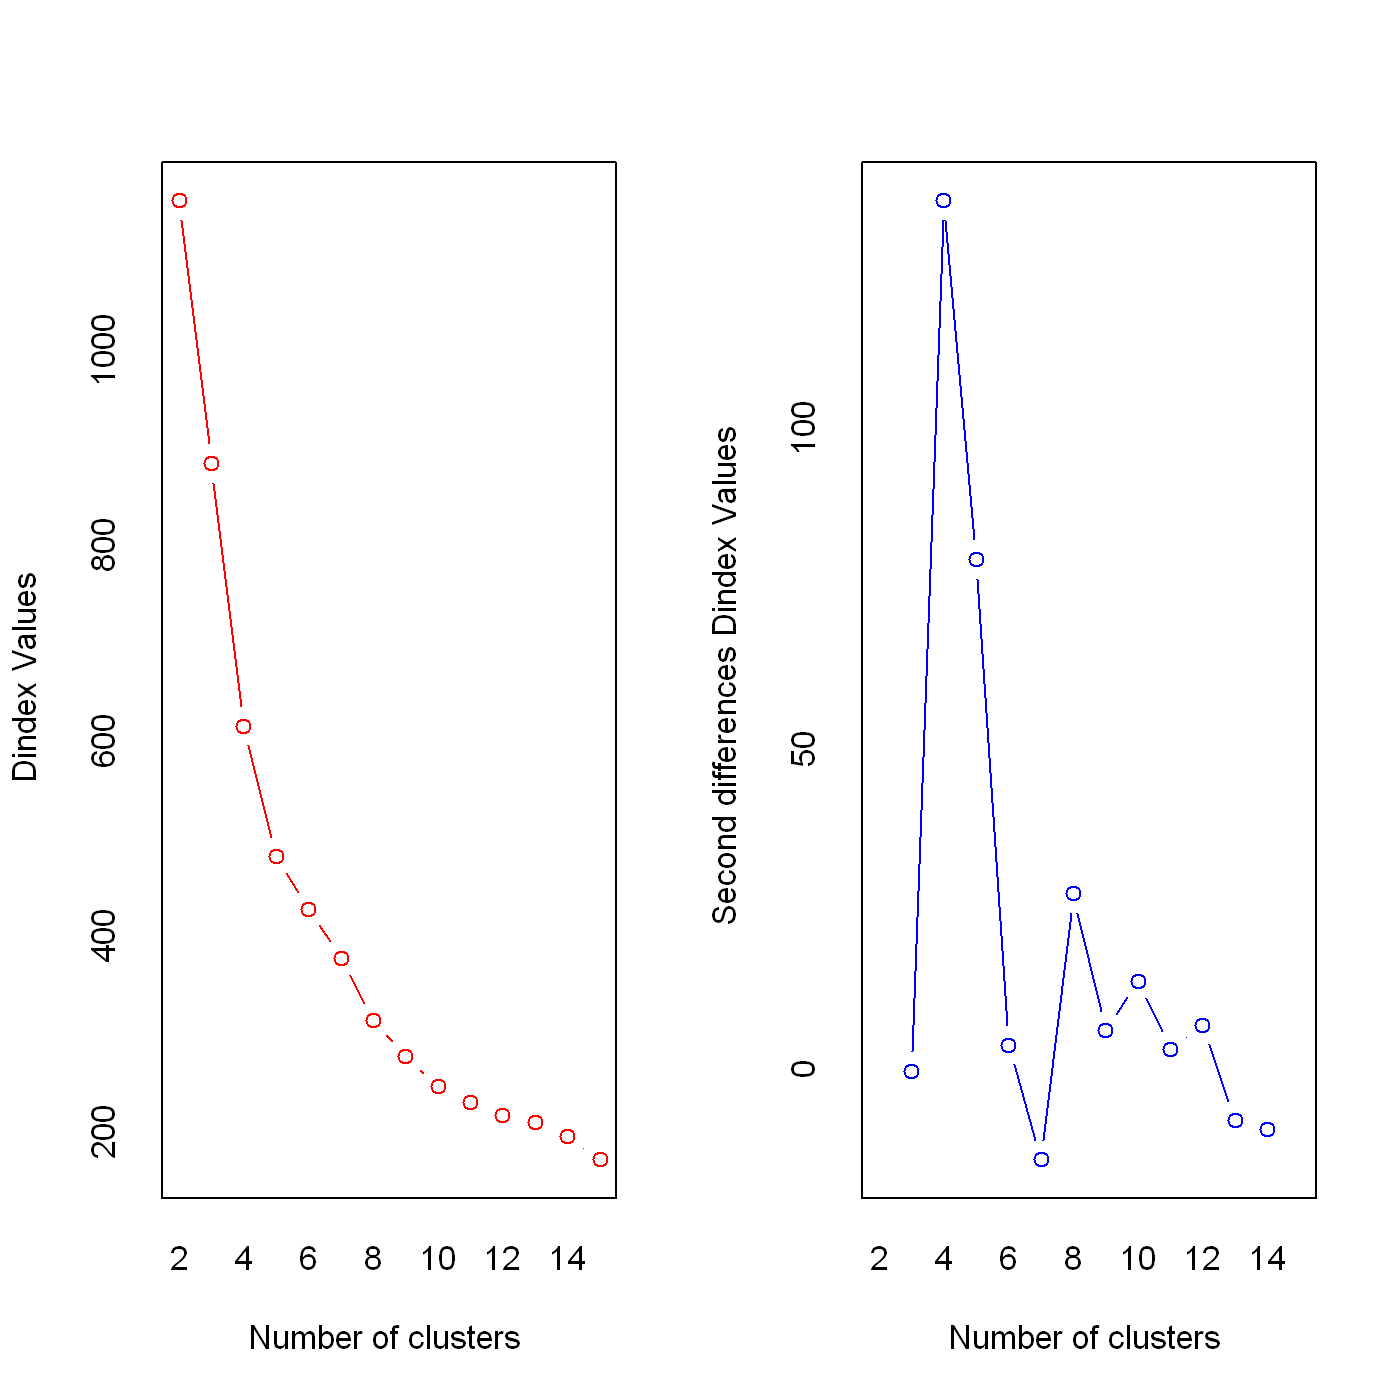

In [75]:
nc <- NbClust(train.data, min.nc=2, max.nc = 15, method="kmeans")

* Hubert index와 D index 값의 근거하여 최적의 군집의 수를 4로 채택 : 군집분석 타당성 지표 다시 공부

In [76]:
names(nc)

[1] "All.index"          "All.CriticalValues" "Best.nc"           
[4] "Best.partition"

In [77]:
nc$Best.partition

[1] 3 3 3 3 3 3 3 4 3 4 4 3 3 4 1 3 4 1 3 4 2 4 4 1 3 4 4 3 3 3 3 3 3 2 4 1 1
 [38] 4 3 4 1 3 3 3 3 4 4 3 3 1 1 4 3 1 1 3 4 3 3 3 3 2 3 4 4 3 3 3 4 3 1 4 1 3
 [75] 2 4 3 3 1 3 3 4 4 2 3 3 3 3 1 3 3 4 3 3 1 2 4 4 3 4 3 3 1 4 2 3 1 4 1 3 4
[112] 3 3 1 4 3 3 3 3 3 3 3 3 4 4 3 3 3 2 3 4 1 3 4 4 1 1 3 3 3 3 3 3 4 4 2 3 1
[149] 3 3 3 3 1 1 3 2 3 3 3 3 4 3 1 3 4 4 4 3 3 1 4 3 3 4 3 3 3 3 4 2 3 3 3 4 3
[186] 2 3 3 4 3 2 3 3 1 3 3 4 1 3 4 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 4 4 3 3
[223] 4 3 3 3 3 2 3 3 3 3 4 1 3 3 4 3 4 3 3 4 4 3 4 1 4 3 1 1 3 4 4 3 4 3 3 3 2
[260] 4 3 4 3 4 3 3 1 1 4 3 3 3 4 3 4 3 3 3 4 3 3 4 4 3 3 4 3 3 3 1 4 1 4 3 3 4
[297] 3 2 3 3 4 4 3 1 1 3 3 3 1 4 1 3 3 3 3 3 3 2 3 1 3 4 3 3 4 3 3 4 4 4 3 3 4
[334] 4 4 1 3 4 4 3 3 1 3 3 3 4 4 4 3 1 3 4 1 3 4 3 3 4 3 1 3 3 3 1 1 4 3 3 3 4
[371] 4 3 4 1 3 3 4 3 3 3 4 1 4 4 3 3 1 3 3 3 3 3 1 3 3 3 3 3 4 3 3 4 3 3 3 3 3
[408] 4 1 4 4 4 1 3 3 3 4 3 3 4 3 3 1 1 2 3 1 3 3 3 4 4 1 3 4 3 3 3 4 3 4 3 4 4
[445] 4 3 1 4 3 1 4 3 2 4 4 4 3 3 3 1 3 3 4 3 4 4 3 1 4 4 3 3 4 3 3 4 3 1 3 3 4
[482] 3 3 3 3 3 4 3 3 3 3 1 3 3 3 3 4 3 1 3 1 3 1 3 2 1 1 1 3 3 3 4 3 4 4 1 3 4
[519] 4 3 3 3 2 3 3 3 4 4 4 3 3 3 4 4 3 1 3 4 4 1 3 3 3 4 4 4 4 4 1 3 1 3 3 3 3
[556] 4 3 4 3 3 1 3 3 3 3 4 4 3 3 4 3 4 3 3 3 4 3 4 4 3 4 3 3 1 4 2 4 4 3 4 4 3
[593] 4 4 3 3 3 3 4 4 3 3 3 3 3 3 4 3 3 3 4 4 3 2 3 4 4 3 3 3 3 3 1 3 3 3 1 4 3
[630] 3 3 3 2 3 4 3 4 1 4 3 3 4 1 4 1 1 4 3 3 1 3 3 1 2 3 3 3 3 4 3 1 3 1 3 3 3
[667] 4 3 1 1 3 3 4 1 2 4 4 3 4 3 3 3 3 3 3 1 3 4 3 3 4 4 4 1 4 3 3 4 3 3

***

# 3. 혼합 분포 군집

* 데이터가 K개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정하에서 모수와 함께 가중치를 자료로부터 추정하는 방법을 사용

* K개의 각 모형은 군집을 의미하며, 각 데이터는 추정된 K개의 모형 중 어느 모형으로 부터 나왔을 확률이 높은지에 따라 군집의 분류가 이루어진다.

* 흔히 혼합 모형에서의 모수와 가중치의 추정(MLE)에는 EM 알고리즘이 사용된다.

* K-means 방법과 유사하지만 확률분포를 도입하여 군집을 수행한다.

* Mclust함수의 `G`인자는 클러스터의 수를 지정하나, 디폴트는 `2:9` 에서 스스로 최적 군집의 수를 찾아준다.

* `summary`함수의 `parameter = T` 하여 혼합분포의 모수추정치와 함께 각 군집별 해당 자료에 대한 요약결과를 확인할 수 있다.

In [6]:
library(mclust)

In [8]:
mc <- Mclust(iris %>% select(-Species),G=3)
#summary(mc,parameters=T)

In [16]:
library(factoextra)

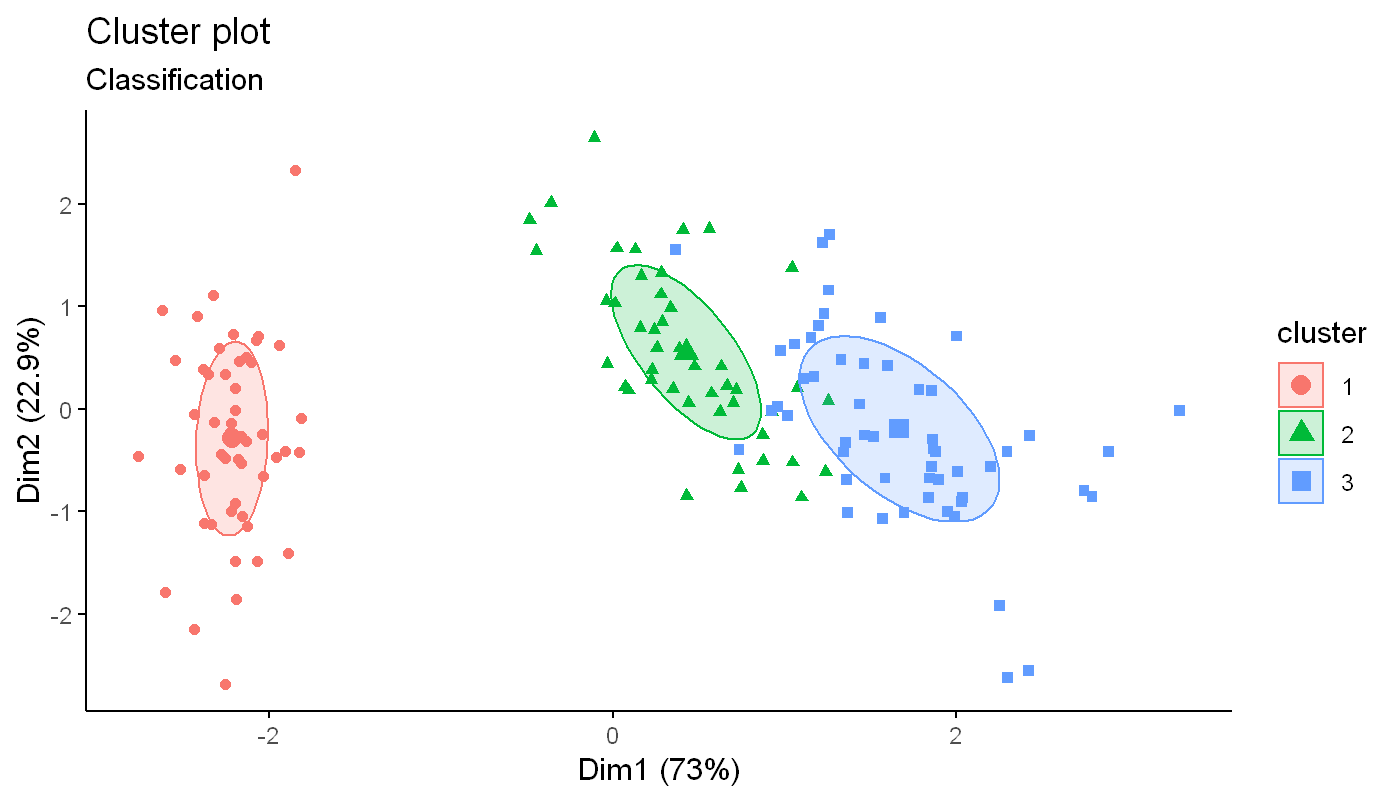

In [17]:
options(repr.plot.res=200, repr.plot.height=4,repr.plot.width=7)
fviz_mclust(mc,"classification",geom="point")

***

# 4. 연관분석 (Association analysis)

## 4-1. 측도

$\divideontimes$ tip:측도의 단어 뜻을 직관적으로 받아들여 해석하자.

* 지지도 (Support) : 전체 거래 중 항목 A와 항목 B를 동시에 포함하는 거래의 비율로 정의한다.

$\quad P (A \cup B)$

* 신뢰도 (Confidence) : 항목 A를 포함한 거래중 항목 B도 같이 포함될 확률 

$\begin {eqnarray*}\quad P(B|A) = \frac {P(A\cap B)}{P(A)} \end{eqnarray*}$

*  향상도 (Lift) : A가 구매되지 않았을 때 품목 B의 구매확률에 비해 A가 구매됐을 때 품목 B의 구매확률의 증가비

$\quad \begin {eqnarray*}  \frac {P(B|A)}{P(B)}\end{eqnarray*}$

## 4-2. Apriori 알고리즘

* 빈발항목집합(frequent item set) : 최소 지지도 보다 큰 지지도 값을 갖는 품목의 집합

* Apriori 알고리즘 : 모든 품목집합에 대한 지지도를 전부 계산하는 것이 아니라, 최소 지지도 이상의 빈발항목집합을 찾은 후 그것들에 대해서만 연관규칙을 계산하는 것.

* 지지도가 낮은 후보 집합 생성 시 아이템의 개수가 많아지면 계산 복잡도가 증가한다는 문제점을 가지고 있다.

## 4-3. R실습

* as함수를 이용하여 데이터프레임을 `transactions` 함수로 변형 후에 진행하여야 하나 예제 데이터는 이미 변형이 된 데이터이다.

In [92]:
library(arules)

In [102]:
data(Groceries)
inspect(Groceries[1:3]) ##연관규칙 확인

    items                
[1] {citrus fruit,       
     semi-finished bread,
     margarine,          
     ready soups}        
[2] {tropical fruit,     
     yogurt,             
     coffee}             
[3] {whole milk}         


In [103]:
rules <- apriori(Groceries,
                 parameter = list(support=0.01,
                                  confidence = 0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [125 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


* 총 125개의 연관규칙이 생성되었다.

In [104]:
inspect(sort(rules,by=c("confidence"),decreasing = T)[1:5])

    lhs                                 rhs                support   
[1] {citrus fruit,root vegetables}   => {other vegetables} 0.01037112
[2] {tropical fruit,root vegetables} => {other vegetables} 0.01230300
[3] {curd,yogurt}                    => {whole milk}       0.01006609
[4] {other vegetables,butter}        => {whole milk}       0.01148958
[5] {tropical fruit,root vegetables} => {whole milk}       0.01199797
    confidence coverage   lift     count
[1] 0.5862069  0.01769192 3.029608 102  
[2] 0.5845411  0.02104728 3.020999 121  
[3] 0.5823529  0.01728521 2.279125  99  
[4] 0.5736041  0.02003050 2.244885 113  
[5] 0.5700483  0.02104728 2.230969 118  


* 좌항에서 우항, 우항에서 좌항의 규칙이 겹치는 경우가 있으므로 중복규칙 제거함수 구현

In [106]:
prune.dup.rules <- function(rules) {
                    rule.subset.matrix <- is.subset(rules,rules,sparse=F)
                    rule.subset.matrix[lower.tri(rule.subset.matrix, diag =T)] <- NA
                    dup.rules <- colSums(rule.subset.matrix,na.rm =T) >=1
                    pruned.rules <- rules[!dup.rules]
                    return (pruned.rules)
                    }

* 만약 우변의 아이템 구매를 이끌 아이템을 찾고 싶다면?

In [107]:
metric.params <- list(supp=0.001,conf=0.5,minlen=2) ## minlen은 좌항과 우항을 합친 최소 물품수
rules <- apriori(Groceries,
                 parameter = metric.params,
                 appearance = list(default = "lhs",rhs="soda"),
                 control = list(verbose=F))

* `apperance` : 우측의 `soda`를 사기위해 좌항의 아이템을 찾는 것으로 설정
* `verbose` : `apriori` 함수 실행 결과를 나타낼지의 여부를 묻는 인자

In [108]:
rules <- prune.dup.rules(rules)

In [109]:
rules <- sort(rules,decreasing=T,by="confidence")

In [110]:
inspect(rules[1:5])

    lhs                                     rhs    support     confidence
[1] {coffee,misc. beverages}             => {soda} 0.001016777 0.7692308 
[2] {sausage,bottled water,bottled beer} => {soda} 0.001118454 0.7333333 
[3] {sausage,white bread,shopping bags}  => {soda} 0.001016777 0.6666667 
[4] {rolls/buns,bottled water,chocolate} => {soda} 0.001321810 0.6500000 
[5] {pastry,misc. beverages}             => {soda} 0.001220132 0.6315789 
    coverage    lift     count
[1] 0.001321810 4.411303 10   
[2] 0.001525165 4.205442 11   
[3] 0.001525165 3.823129 10   
[4] 0.002033554 3.727551 13   
[5] 0.001931876 3.621912 12   


* 만약 좌변의 아이템 세트를 가지고 있을 때 물품을 찾고 싶다면?

In [113]:
metric.params <- list(supp=0.001,conf=0.3,minlen=2) ## minlen은 좌항과 우항을 합친 최소 물품수
rules <- apriori(Groceries,
                 parameter = metric.params,
                 appearance = list(default = "rhs",lhs=c("yogurt","sugar")),
                 control = list(verbose=F))

In [114]:
rules <- prune.dup.rules(rules)

In [115]:
rules <- sort(rules,decreasing=T, by="confidence")

In [116]:
inspect(rules,decreasing=T,by="confidence")

    lhs               rhs                  support     confidence coverage   
[1] {sugar}        => {whole milk}         0.015048297 0.4444444  0.033858668
[2] {yogurt}       => {whole milk}         0.056024403 0.4016035  0.139501779
[3] {sugar}        => {other vegetables}   0.010777834 0.3183183  0.033858668
[4] {yogurt}       => {other vegetables}   0.043416370 0.3112245  0.139501779
[5] {yogurt,sugar} => {whipped/sour cream} 0.002135231 0.3088235  0.006914082
[6] {yogurt,sugar} => {root vegetables}    0.002135231 0.3088235  0.006914082
    lift     count
[1] 1.739400 148  
[2] 1.571735 551  
[3] 1.645119 106  
[4] 1.608457 427  
[5] 4.308198  21  
[6] 2.833283  21  


***

## Extra. SOM (자기조직화지도)

In [107]:
library(kohonen) ## somgmgid를 위한함수

In [122]:

train <- sample(1:150, 100) #무작위로 100개 추출 (학습데이터)
train_Set <-  list( x = as.matrix(iris[train,-5]), Species = as.factor(iris[train,5])) #학습데이터 list형
test_Set <- list(x = as.matrix(iris[-train,-5]), Species = as.factor(iris[-train,5])) #테스트 데이터 list형
gr <- somgrid(xdim = 3, ydim = 5, topo = "hexagonal") #grid 갯수 및 모양 설정
ss <- supersom(train_Set, gr, rlen = 200, alpha = c(0.05, 0.01)) #som 학습하기


* grid : 경쟁층의 가충치 테이블을 `5 x 4`로 설정 topology 위상방법은 `rectangular, hexagonal` 두가지 중 하나를 설정한다.

* rlen : 전체 데이트 세트가 네트워크에 표시되는 횟수 (= 학습 횟수)

* alpha : 학습율, 변화의 양을 나타내는 두 개의 숫자의 벡터. 기본값은 rlen 업데이트에 대해 0.05에서 0.01로  선형적으로 감소하는 것이다. 

In [123]:
summary(ss)

SOM of size 3x5 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 2.
Distance measure(s) used: sumofsquares, tanimoto.
Training data included: 100 objects.
Mean distance to the closest unit in the map: 0.008.


* 요약결과 가장 가까운 노드까지의 평균 거리가 0.008 이다.

* 학습을 거듭하면서 뉴런과 학습 데이터의 거리가 짧아짐을 아래와 같이 확인할 수 있었다.

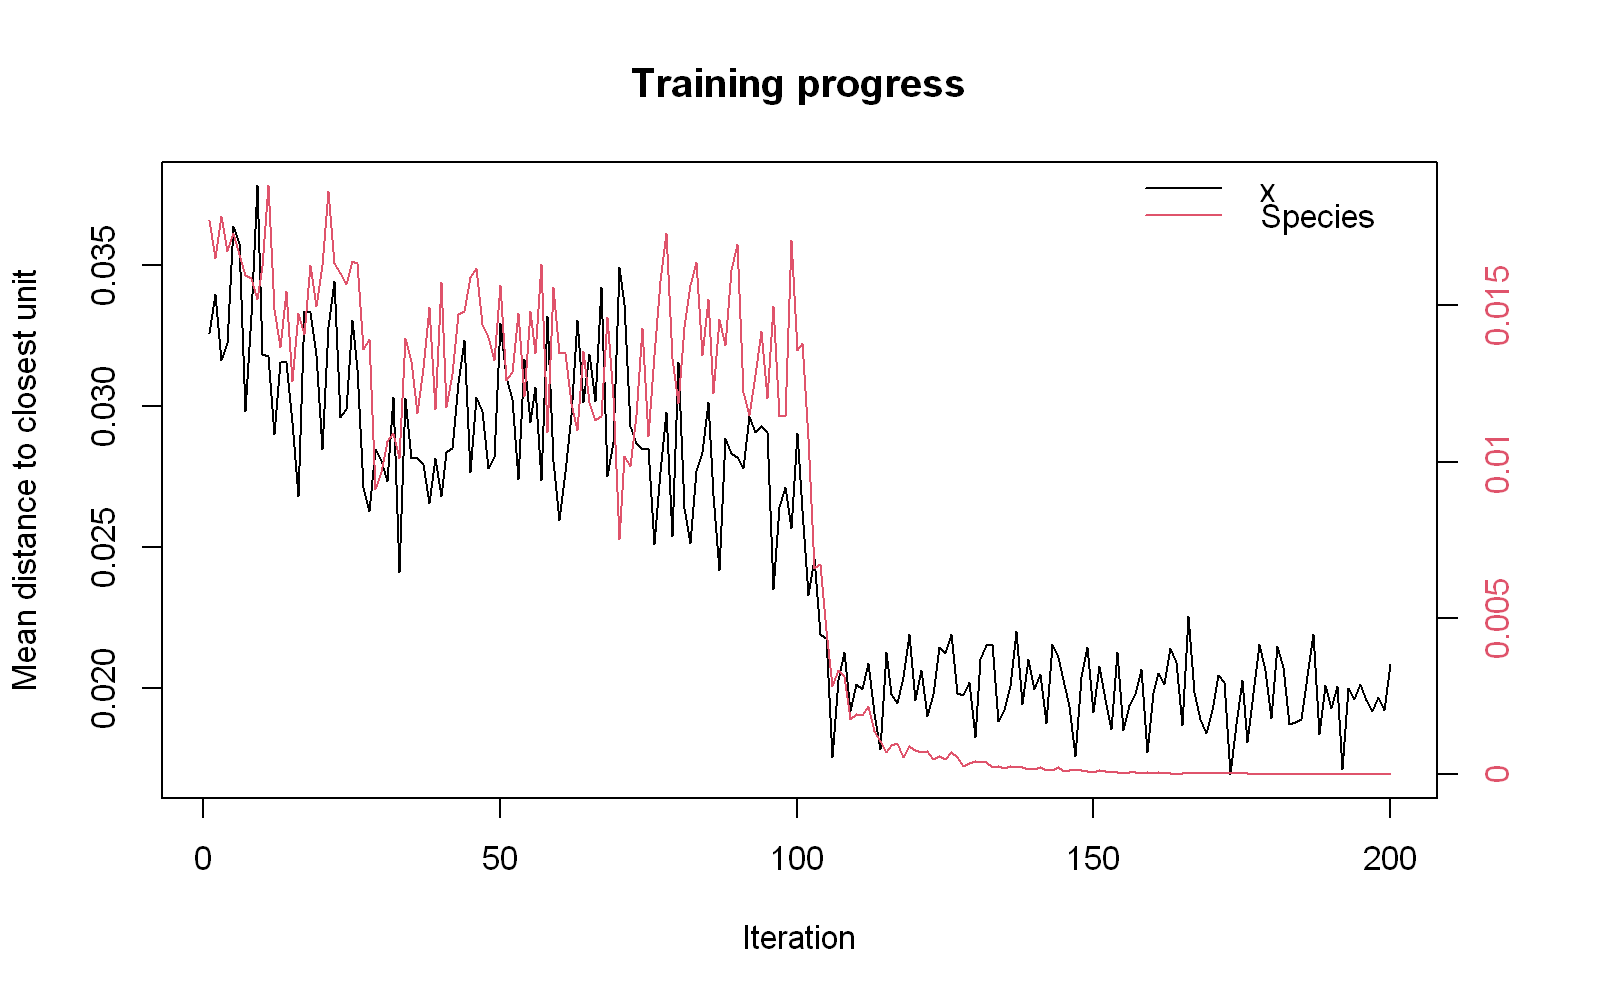

In [148]:
plot(ss,type="change")

* 또한 학습된 som모델의 각 뉴런이 몇 개의 학습 데이터와 매핑이 되는 지를 확인 할 수 있었다.

* 결과적으로 보았을 때 매핑이 더ㅣ지않은 뉴런이 존재하는 것으로 보아 생성한 `som` 모델의 신경망 크기가 크다는 것을 의미한다.

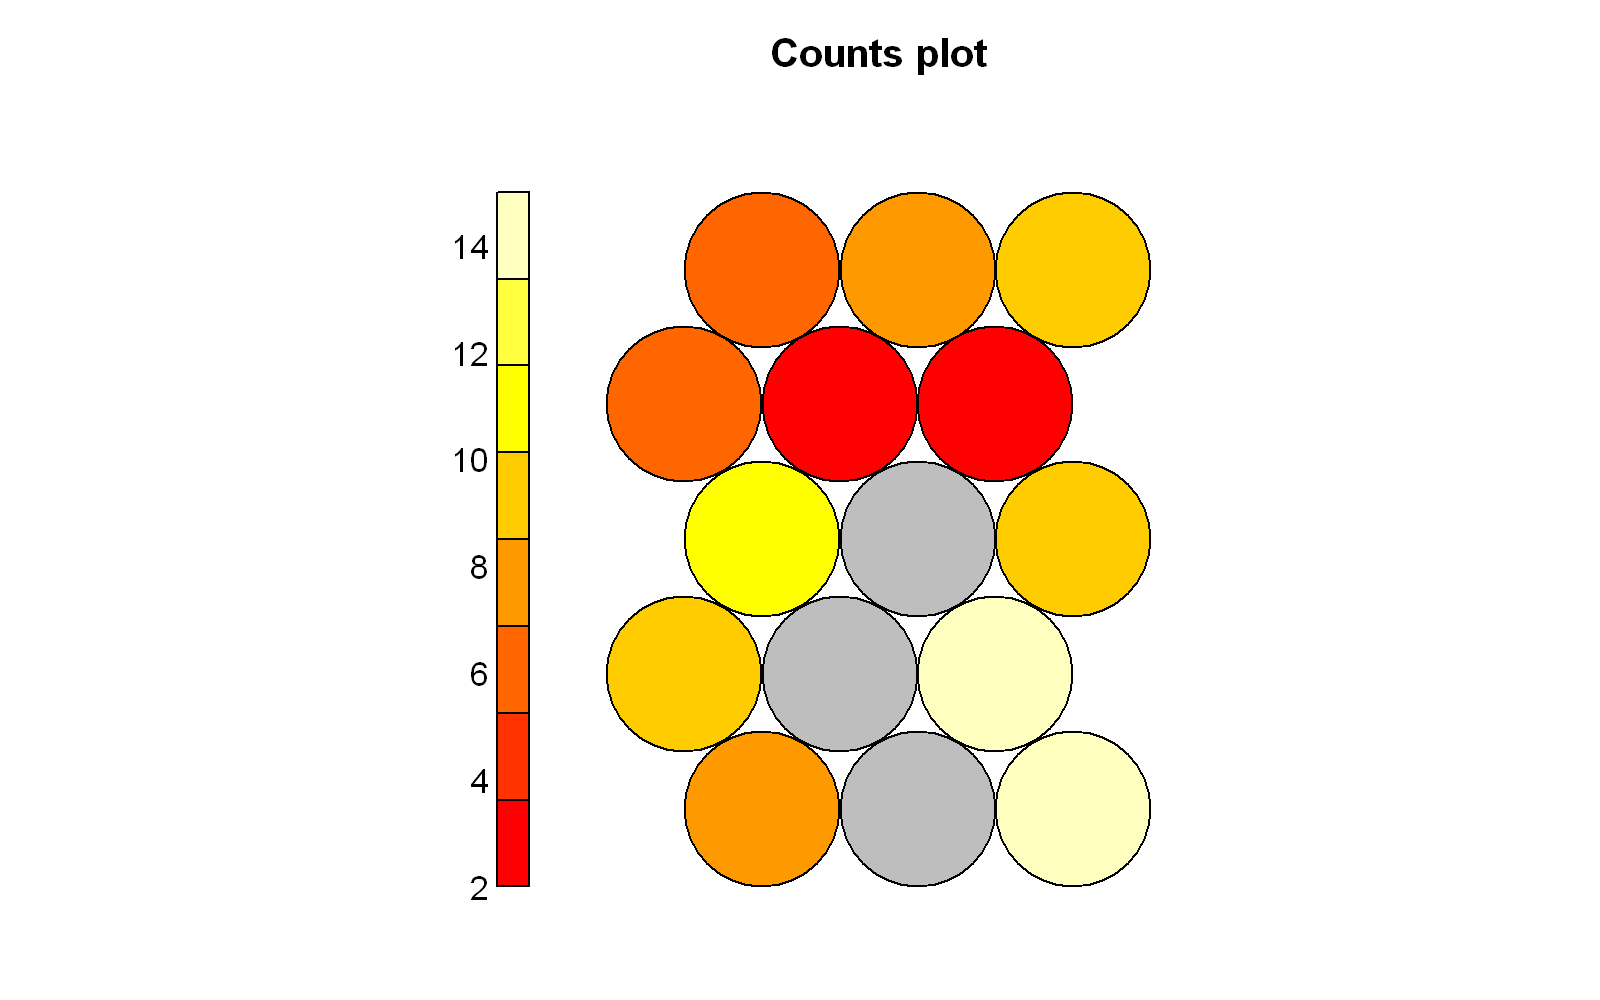

In [149]:
plot(ss, type="count")

* 아래와 같이 통합거리매트릭스를 그려 각 뉴런의 이웃간 거리를 표현할 수 있었다. 값이 높을 수록 해당 뉴런은 이웃뉴련과 비유사하다고 할 수 있다.

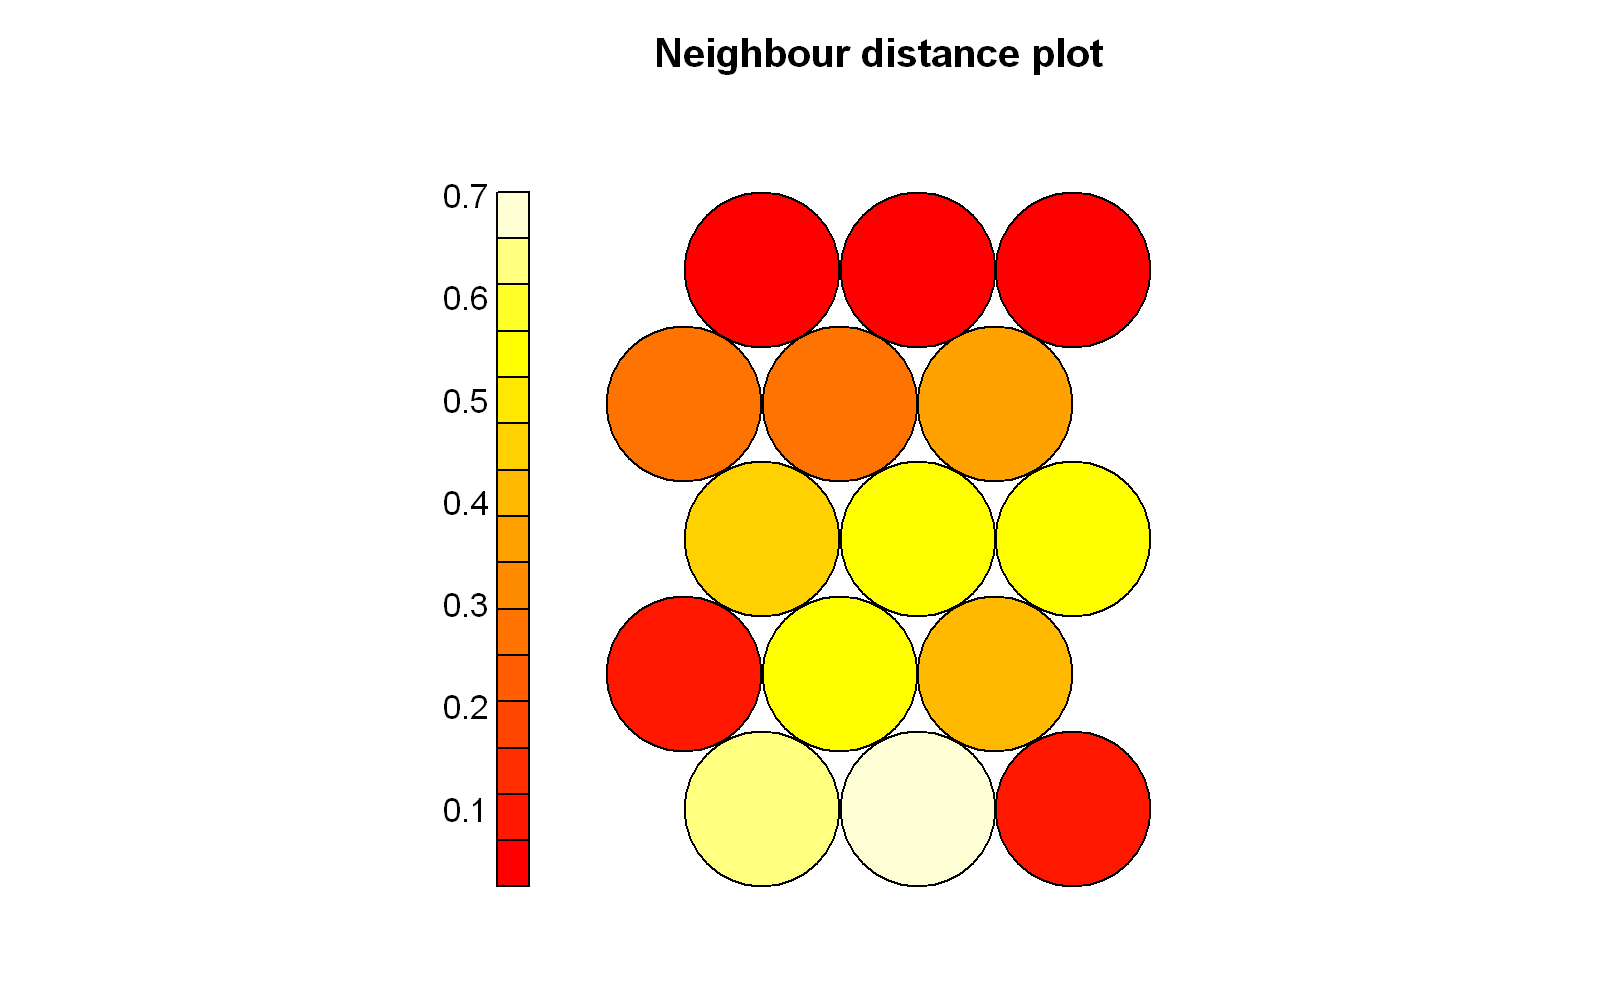

In [150]:
plot(ss, type="dist.neighbours")

* 또한 아래그림처럼 각 뉴런에서 `Species`의 속성들 가중치 기여율을 알 수 있다.

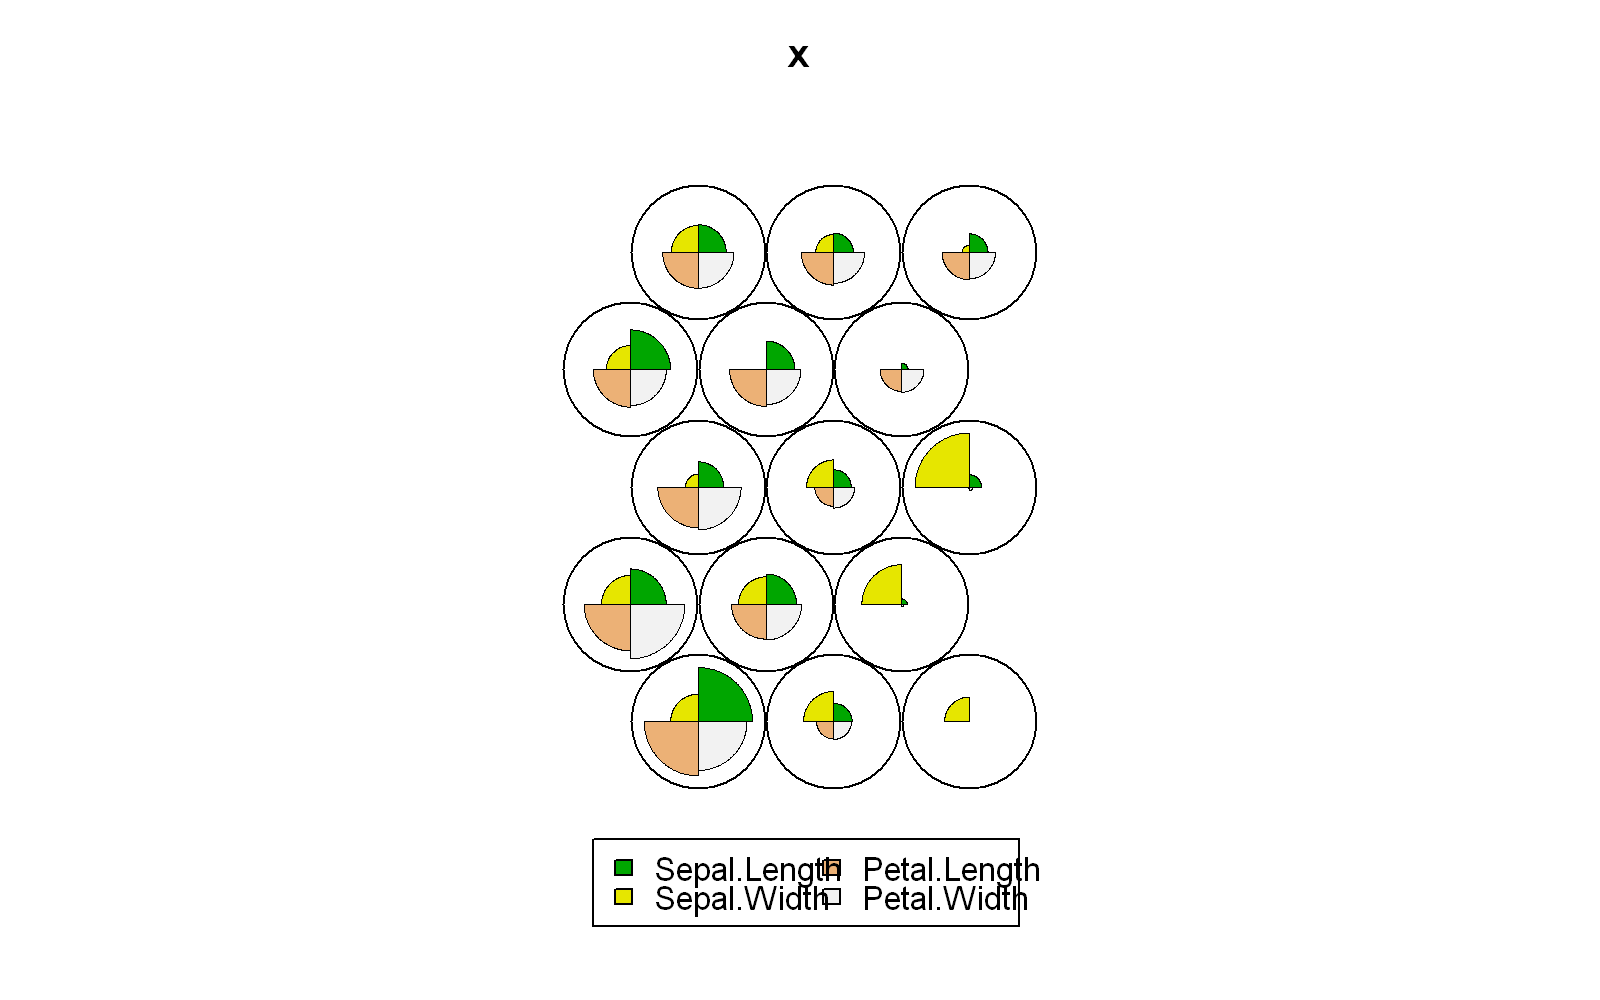

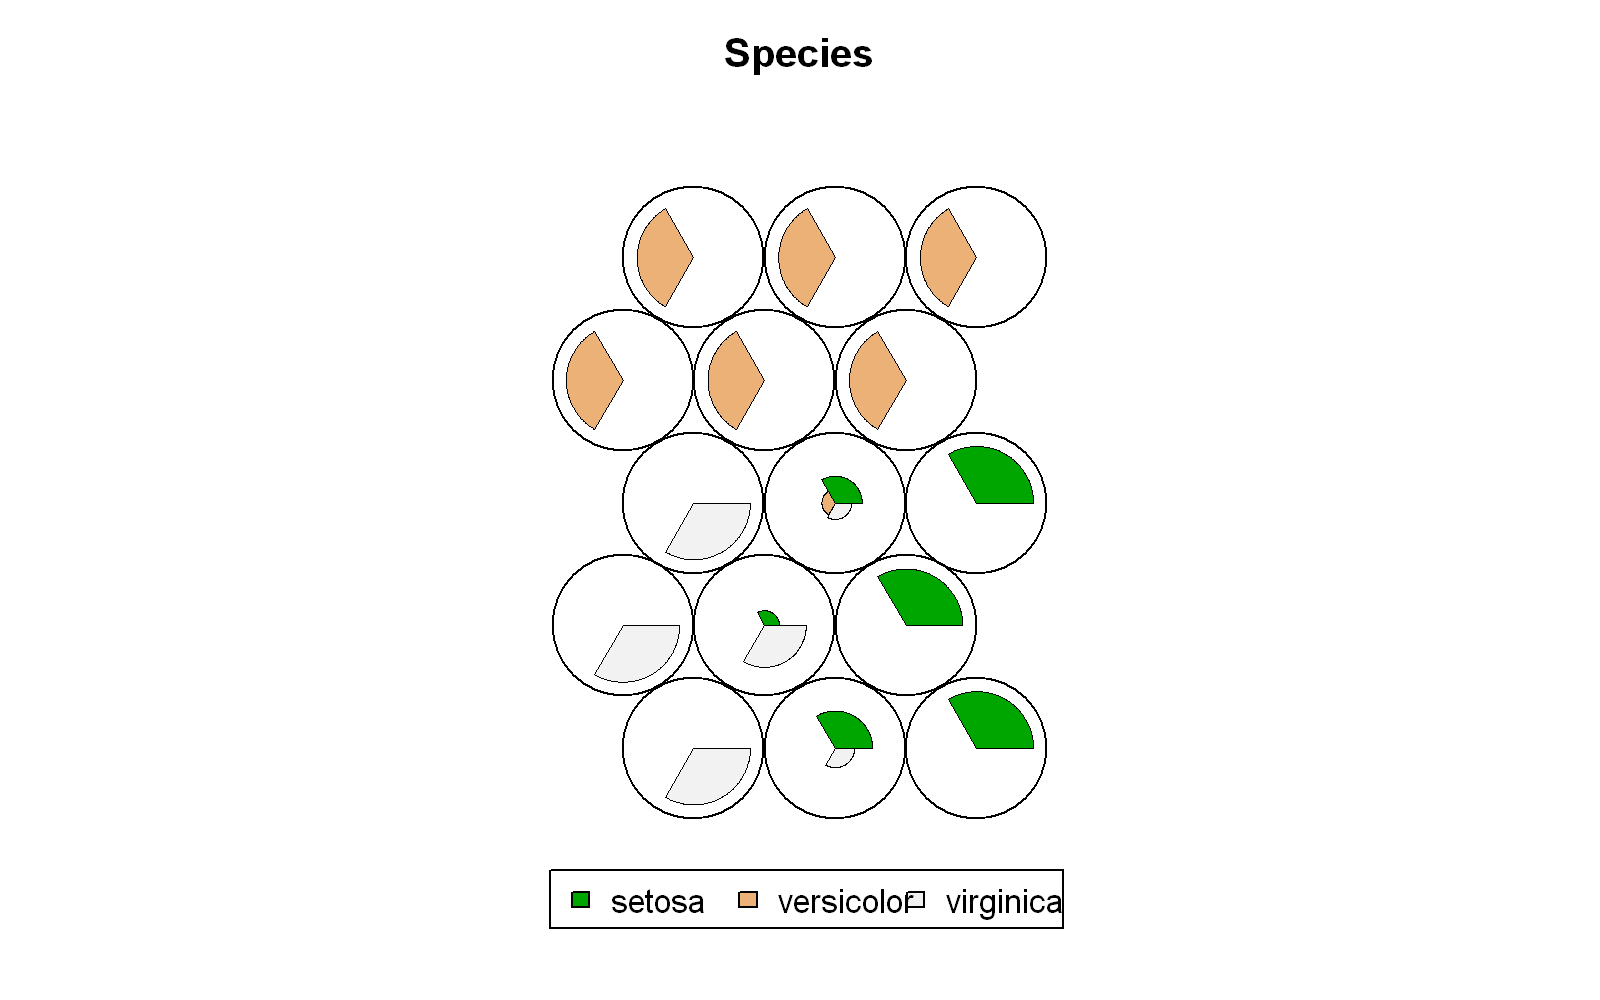

In [151]:
plot(ss, type="codes")

* 학습된 모델을 통해 학습에 사용된 데이터 분류와 모델분류를 확인하기 위해 혼동행렬을 그려보면 아래와 같다.

In [160]:
som.prediction <- predict(ss, newdata = test_Set[1],type="class")

In [163]:
som.prediction$predictions$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] <NA>       versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor <NA>       versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor virginica  virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] versicolor virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica  virginica  virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica

In [158]:
library(caret)

In [164]:
confusionMatrix(som.prediction$predictions$Species,test_Set$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         14         1
  virginica       0          0        21

Overall Statistics
                                          
               Accuracy : 0.9792          
                 95% CI : (0.8893, 0.9995)
    No Information Rate : 0.4583          
    P-Value [Acc > NIR] : 3.148e-15       
                                          
                  Kappa : 0.9677          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            1.0000           0.9545
Specificity                   1.00            0.9706           1.0000
Pos Pred Value                1.00            0.9333           1.0000
Neg Pred Value                1.00            1.0000           0.9630
P